<a href="https://colab.research.google.com/github/AlbertoPS93/Finance/blob/main/correlacion_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando paquetes
import numpy as np
import pandas as pd
import datetime as dt

from pandas_datareader import data as pdr
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

In [ ]:
# estableciendo rango de fecha
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [ ]:
# etfs a utilizar
etflist = ['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI','FEZ']
print(etflist)

['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI', 'FEZ']


In [ ]:
# obteniendo datos desde yahoo finance
data = yf.download(etflist, start=start, end=end)
close_price = data['Close']
close_price.tail(3)

/tmp/ipython-input-2624804055.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(etflist, start=start, end=end)
[*********************100%***********************]  11 of 11 completed


Ticker,DIA,EEM,FEZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2025-08-15,449.529999,49.939999,60.959999,307.429993,95.230003,227.130005,59.680000,577.340027,643.440002,86.400002,72.800003
2025-08-18,449.049988,50.230000,60.599998,306.950012,95.139999,227.960007,60.040001,577.109985,643.299988,86.150002,73.169998
2025-08-19,451.519989,49.959999,61.064999,306.259888,95.339996,227.899994,59.930000,571.739990,642.090027,86.559998,72.540001


In [ ]:
close_price.shape

(2673, 11)

In [ ]:
# verificando datos NaN
close_price.isnull().sum()

,0
Ticker,
DIA,0
EEM,0
FEZ,0
GLD,0
IEF,0
IWM,0
MCHI,0
QQQ,0
SPY,0


In [ ]:
# calculando variación procentual
change_price = close_price.pct_change().dropna()
change_price.tail(3)

Ticker,DIA,EEM,FEZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2025-08-15,0.001417,0.001203,0.006771,0.000586,-0.001991,-0.004863,0.006408,-0.004397,-0.002341,-0.007125,-0.012747
2025-08-18,-0.001068,0.005807,-0.005906,-0.001561,-0.000945,0.003654,0.006032,-0.000398,-0.000218,-0.002894,0.005082
2025-08-19,0.005501,-0.005375,0.007673,-0.002248,0.002102,-0.000263,-0.001832,-0.009305,-0.001881,0.004759,-0.008610


In [ ]:
# reordenando las columnas para dejar al SPY en la primera
change_price = change_price[['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI','FEZ']]
change_price

Ticker,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,MCHI,FEZ
Date,,,,,,,,,,,
2015-01-05,-0.018060,0.015709,0.015077,-0.014668,-0.013369,-0.017797,0.006102,-0.055304,-0.017421,-0.001393,-0.042629
2015-01-06,-0.009419,0.018017,0.011399,-0.013409,-0.017300,-0.004202,0.006718,-0.039383,-0.008293,-0.009564,-0.011344
2015-01-07,0.012461,-0.001974,-0.005891,0.012891,0.012315,0.021625,-0.000186,0.017729,0.012688,0.025548,0.011762
2015-01-08,0.017745,-0.013243,-0.004209,0.019140,0.016962,0.017036,-0.004078,0.009798,0.018054,0.010004,0.015026
2015-01-09,-0.008013,0.010953,0.011385,-0.006583,-0.009603,-0.003299,0.004933,-0.014555,-0.008615,-0.003301,-0.015084
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-13,0.003423,0.008281,0.003049,0.000500,0.019444,0.012024,0.003564,-0.006717,0.010659,0.031160,0.010727
2025-08-14,0.000093,-0.007414,-0.006339,-0.000775,-0.012888,-0.012277,-0.003238,0.017665,-0.000579,-0.020806,0.004146
2025-08-15,-0.002341,-0.007125,0.000586,-0.004397,-0.004863,0.001203,-0.001991,-0.012747,0.001417,0.006408,0.006771


In [ ]:
# matriz de correlación
corr = change_price.corr()
corr

Ticker,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,MCHI,FEZ
Ticker,,,,,,,,,,,
SPY,1.000000,-0.187868,0.040782,0.933570,0.868952,0.753150,-0.163112,0.310723,0.951683,0.536683,0.798350
TLT,-0.187868,1.000000,0.293576,-0.133460,-0.166902,-0.143418,0.916467,-0.191057,-0.223375,-0.109746,-0.165996
GLD,0.040782,0.293576,1.000000,0.049168,0.038472,0.162025,0.369182,0.087927,0.018529,0.102078,0.103904
QQQ,0.933570,-0.133460,0.049168,1.000000,0.770630,0.721268,-0.116415,0.227760,0.819119,0.557745,0.711185
IWM,0.868952,-0.166902,0.038472,0.770630,1.000000,0.693642,-0.143298,0.300019,0.850417,0.502405,0.746342
EEM,0.753150,-0.143418,0.162025,0.721268,0.693642,1.000000,-0.117073,0.329187,0.720666,0.854536,0.778720
IEF,-0.163112,0.916467,0.369182,-0.116415,-0.143298,-0.117073,1.000000,-0.175091,-0.196185,-0.100134,-0.133778
USO,0.310723,-0.191057,0.087927,0.227760,0.300019,0.329187,-0.175091,1.000000,0.322704,0.218892,0.288479
DIA,0.951683,-0.223375,0.018529,0.819119,0.850417,0.720666,-0.196185,0.322704,1.000000,0.493016,0.785882


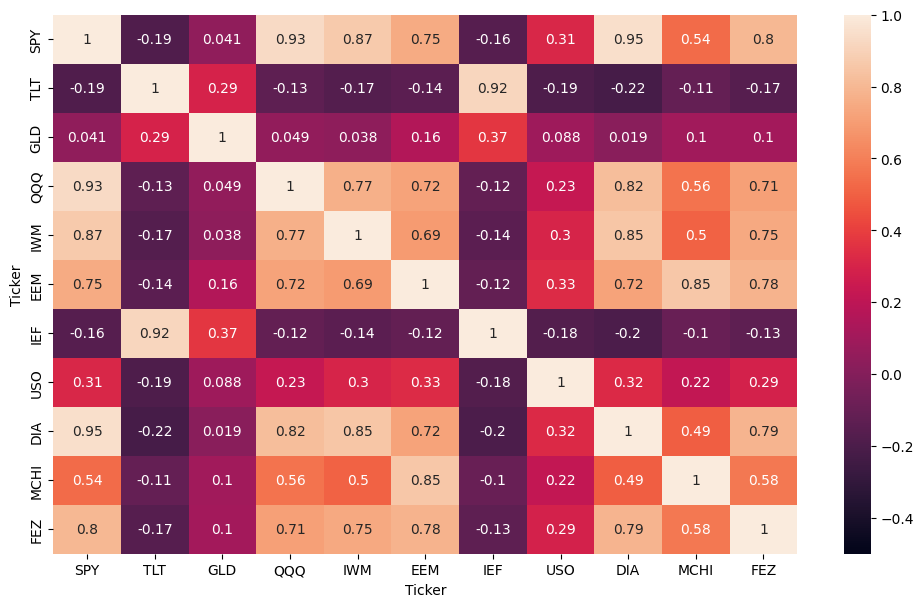

In [ ]:
# graficando
plt.figure(figsize=(12, 7))
sns.heatmap(corr,
            vmax=1, vmin=-.5,
            fmt='.2g',
            annot=True);